# Logistic Regression

## Model assumptions

- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

In [1]:
# Imports
import sys

# Adds the utils directory to the PYTHONPATH
sys.path.append("../utils")  

# Imports everything from common_imports.py
from common_imports import *  

# Adds the project root to the PYTHONPATH
sys.path.append("..")  

# Load cleaned dataset
from config import *
df = pd.read_csv(cleaned_data_path)

In [3]:
# Copy dataframe
df_enc = df.copy()

# Encode `salary` column as ordinal numeric category
salary_cat = ['low', 'medium', 'high']
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(salary_cat).cat.codes)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=True)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


Heatmap to visualize how correlated variables are.

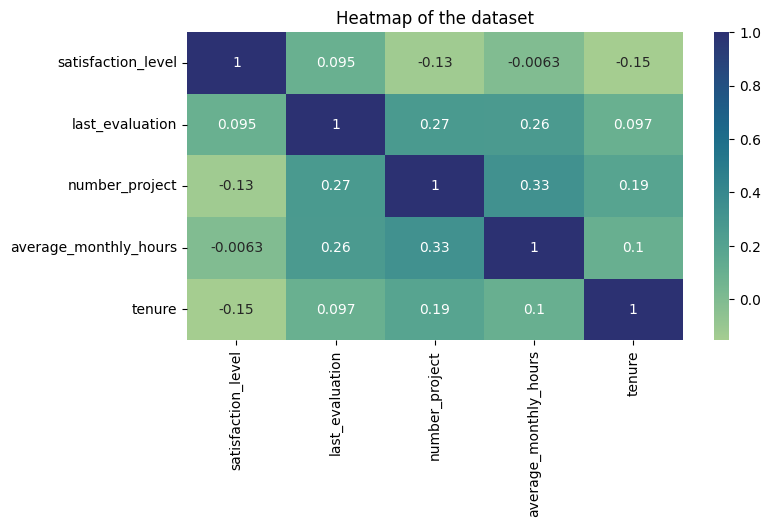

In [4]:
sub = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']
fig = plt.subplots(figsize=(8, 4))
sns.heatmap(df_enc[sub].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

## Outliers

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [5]:
# Compute 25th percentile
percent_25 = df['tenure'].quantile(0.25)

# Compute 75th percentile
percent_75 = df['tenure'].quantile(0.75)

# Compute interquantile range
iqr = percent_75 - percent_25

# Define upper and lower limits for non-oulier values in column
upper_limit = percent_75 + 1.5 * iqr
lower_limit = percent_25 - 1.5 * iqr

In [6]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Save dataset
df_logreg.to_csv('../data/processed/models_data.csv', index=False)

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


**Logistic Regression Model**

In [7]:
# Adds the project root to the PYTHONPATH
sys.path.append("..")  

# Load train / test datasets
# Train sets
X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)

# Test sets
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

In [8]:
# Construct and fit a logistic model
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

# Make predictions using the model
y_pred = log_clf.predict(X_test)

**Confusion Matrix**

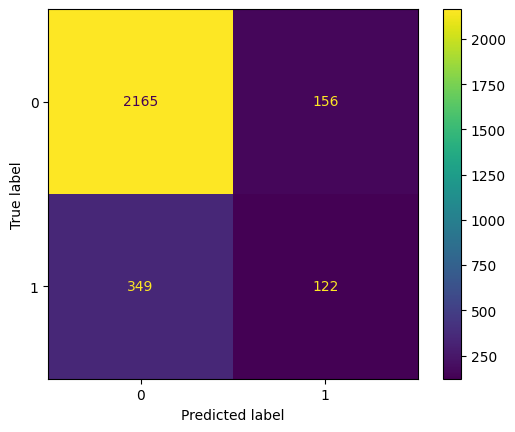

In [9]:
# Confusion Matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Display for the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

**Imbalance Check**

Checking the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [10]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The split between the two classes is 83% to 17%, indicating that the data is not perfectly balanced but not too imbalanced. If the data was more severely imbalanced, resample it to achieve a more balanced distribution. However, in this instance, you can use the data without altering the class balance and proceed with model evaluation.

**Metrics Report**

In [11]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

# Convert to dataframe 
report_df = pd.DataFrame(report).transpose()

# Display results
report_df

,precision,recall,f1-score,support
Predicted would not leave,0.861177,0.932788,0.895553,2321.000000
Predicted would leave,0.438849,0.259023,0.325768,471.000000
accuracy,0.819126,0.819126,0.819126,0.819126
macro avg,0.650013,0.595905,0.610660,2792.000000
weighted avg,0.789932,0.819126,0.799433,2792.000000


We are going to tailor the dataframe so as to be the base for the metrics that will be used in the other models

In [12]:
## Extracting relevant data from the report_df

# Extracting the last row
results = report_df.tail(1).reset_index(drop=True)

# Rename 'f1-score' column
results = results.rename(columns={'f1-score' : 'F1'})

# Adding a new column "model" at the beginning with sample values
results.insert(0, 'model', ['logistic regression'])

# Dropping the last column ("support") from the DataFrame
results.drop(columns=['support'], inplace=True)

# Adding 'accuracy' and 'auc' columns to the DataFrame
results['accuracy'] = report_df.loc['accuracy'][0]
results['AUC'] = roc_auc_score(y_test, y_pred)

# Display the `result` dataframe
results

,model,precision,recall,F1,accuracy,AUC
0,logistic regression,0.789932,0.819126,0.799433,0.819126,0.595905


The table above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80%, and accuracy of 82% with and area under the curve (AUC) of 60%.